In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
df=pd.read_csv("/kaggle/input/mydschsw/realistic_simulated_horvath_data.csv")

In [17]:
df.shape

(20000, 356)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [19]:
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


In [20]:
X = df.drop(columns=['Chronological_Age', 'Biological_Age_Horvath', 'Age_Acceleration'])
y = df['Biological_Age_Horvath']

In [12]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
    alphas=np.logspace(-3, 1, 10),
    cv=5,
    max_iter=10000,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Metrics
print("Best Alpha:", model.alpha_)
print("Best L1 Ratio:", model.l1_ratio_)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R² :", r2_score(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test MAE :", mean_absolute_error(y_test, y_pred))


Best Alpha: 0.002782559402207126
Best L1 Ratio: 0.7
Train R²: 0.9924579738572388
Test R² : 0.9919644198242261
Test RMSE: 1.5553959411687701
Test MAE : 1.245708132740363


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


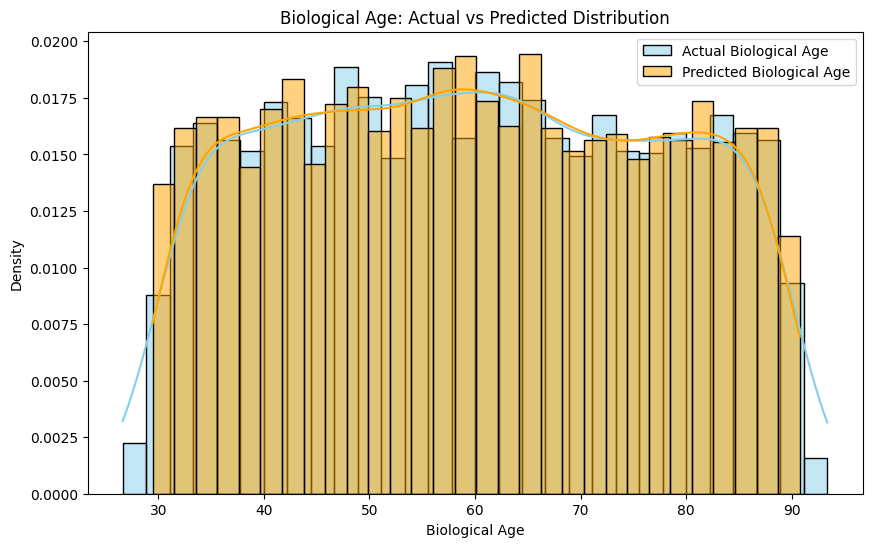

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=30, kde=True, color='skyblue', label='Actual Biological Age', stat='density')
sns.histplot(y_pred, bins=30, kde=True, color='orange', label='Predicted Biological Age', stat='density')
plt.title('Biological Age: Actual vs Predicted Distribution')
plt.xlabel('Biological Age')
plt.ylabel('Density')
plt.legend()
plt.show()

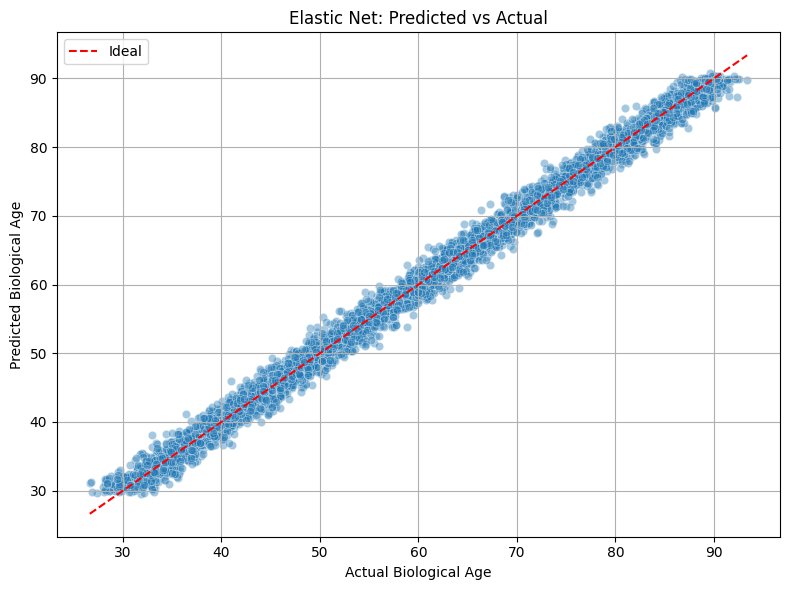

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Biological Age")
plt.ylabel("Predicted Biological Age")
plt.title("Elastic Net: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


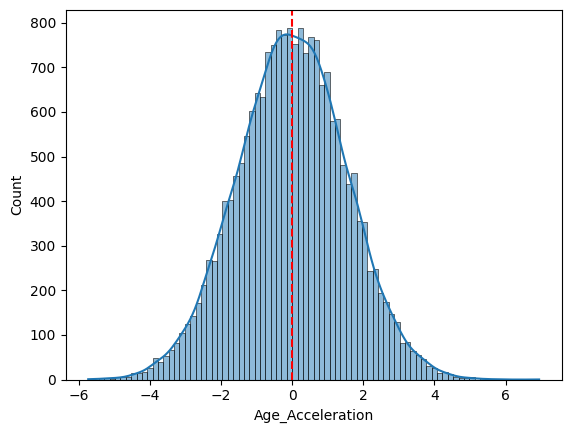

In [26]:
sns.histplot(df['Age_Acceleration'], kde=True)
plt.axvline(0, color='red', linestyle='--')

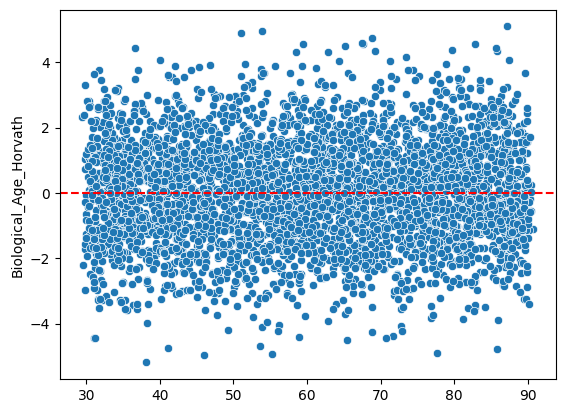

In [27]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

<Axes: >

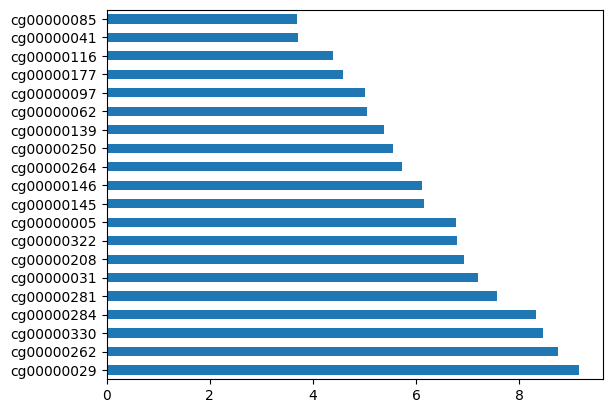

In [31]:
coefs = pd.Series(model.coef_, index=X.columns)
top_coefs = coefs.abs().sort_values(ascending=False).head(20)
top_coefs.plot(kind='barh')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


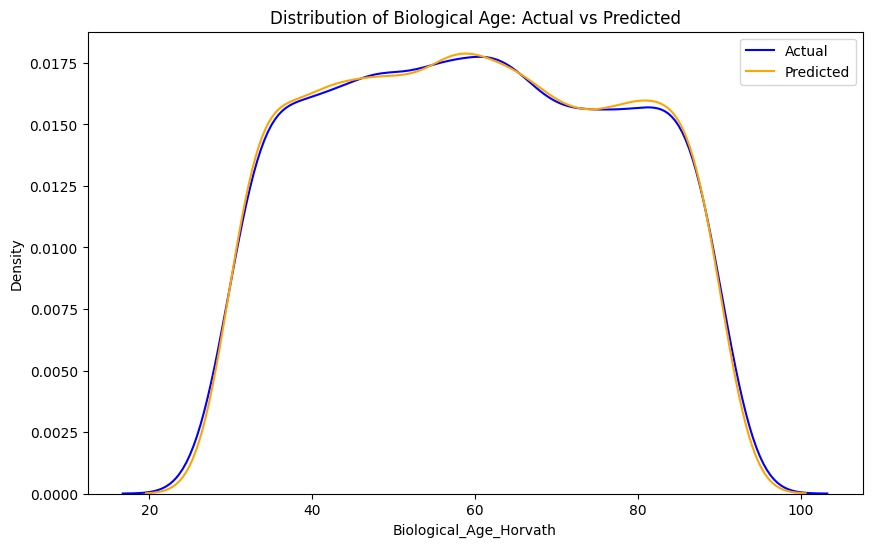

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue')
sns.kdeplot(y_pred, label='Predicted', color='orange')
plt.title("Distribution of Biological Age: Actual vs Predicted")
plt.legend()
plt.show()


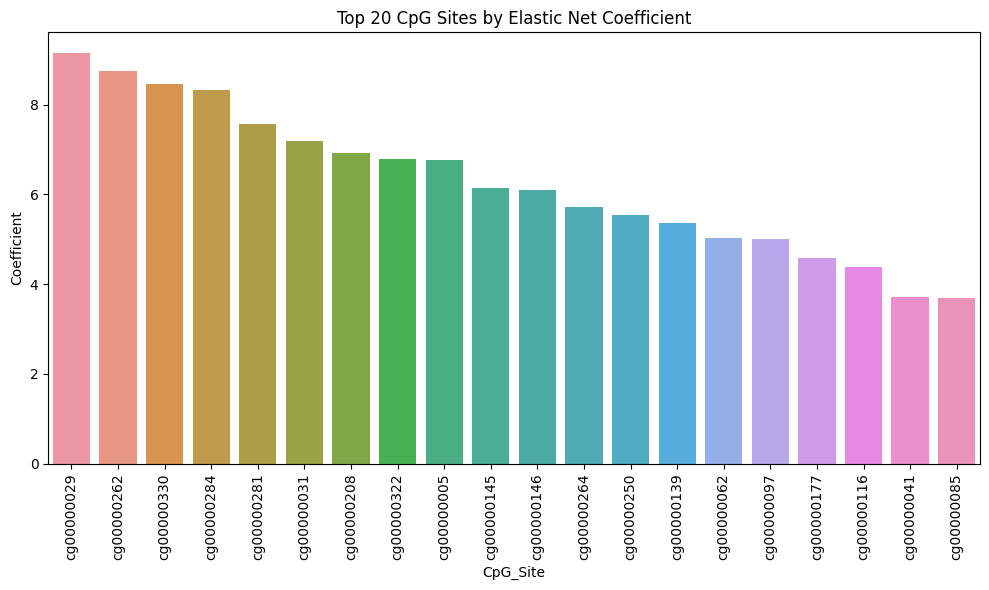

In [33]:
coef_df = pd.DataFrame({
    'CpG_Site': X.columns,
    'Coefficient': model.coef_
})
coef_df = coef_df[coef_df['Coefficient'] != 0]
top_20 = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='CpG_Site', y='Coefficient')
plt.xticks(rotation=90)
plt.title("Top 20 CpG Sites by Elastic Net Coefficient")
plt.tight_layout()
plt.show()


In [34]:
import pickle

# Path to save inside Kaggle's writable directory
model_path = "/kaggle/working/model2f.pkl"

# Save the model
with open(model_path, 'wb') as file:
    pickle.dump(model, file)


